In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

user = pd.read_csv('data.csv')
df_user = user.copy()
df_user.drop(columns=['id', 'name', 'artist'], inplace=True)

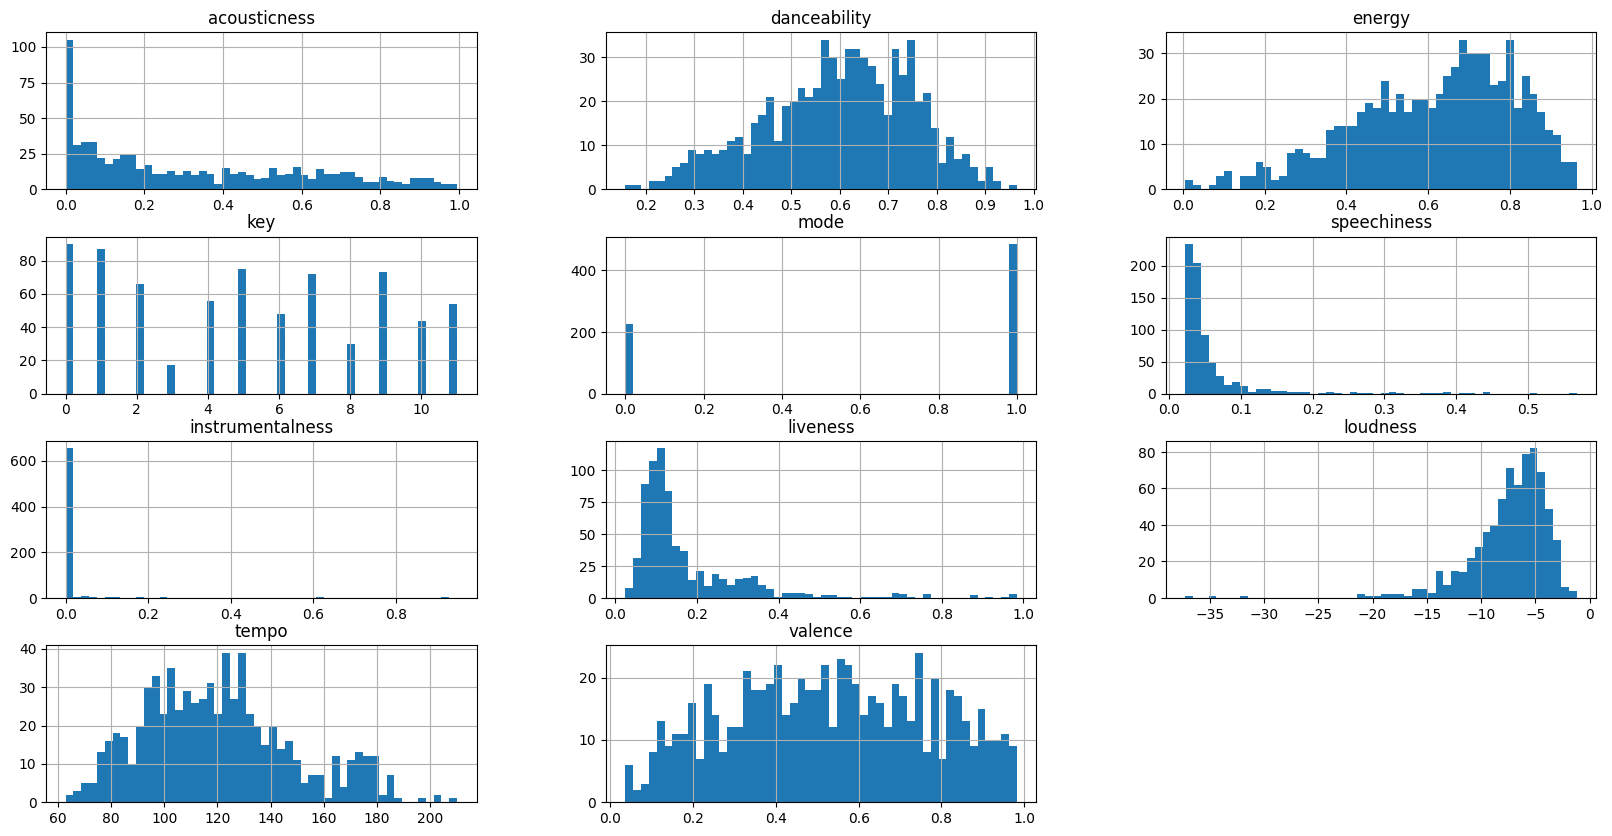

In [288]:
df_user[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
plt.show()


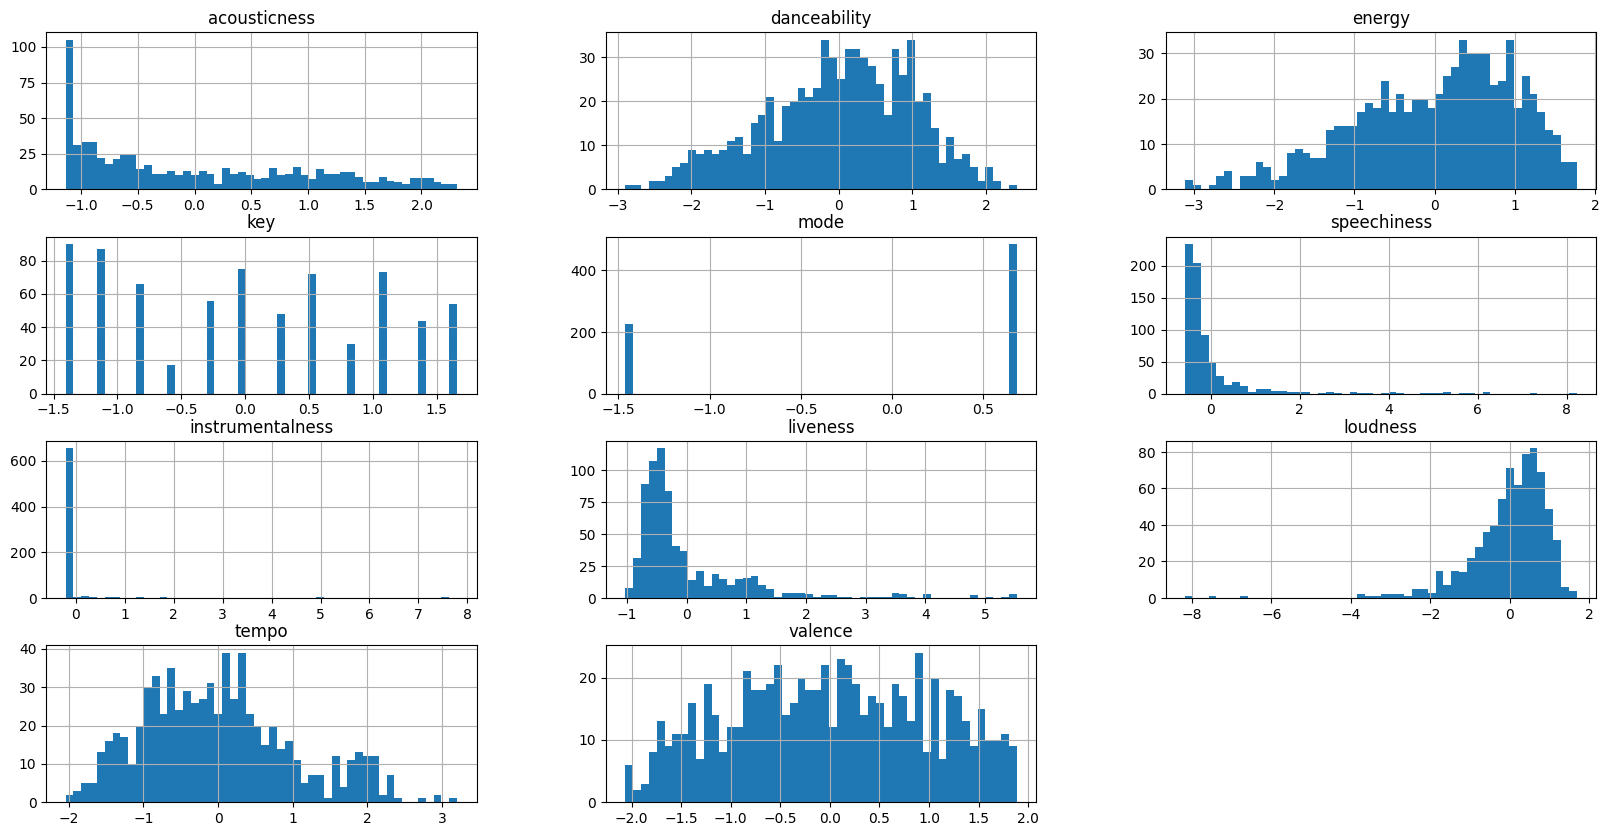

In [250]:
# Estandarización de valores
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

to_cluster = ['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']

user_standard = ss.fit_transform(df_user[to_cluster])

# new dataframe
df_user_standard = pd.DataFrame(user_standard,columns=to_cluster)

# Poner estas columnas nuevamente en el dataframe
df_user_standard['artist'] = df['artist']
df_user_standard['name'] = df['name']

df_user_standard[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))

plt.show()


array([[<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'valence'}>, <Axes: >]], dtype=object)

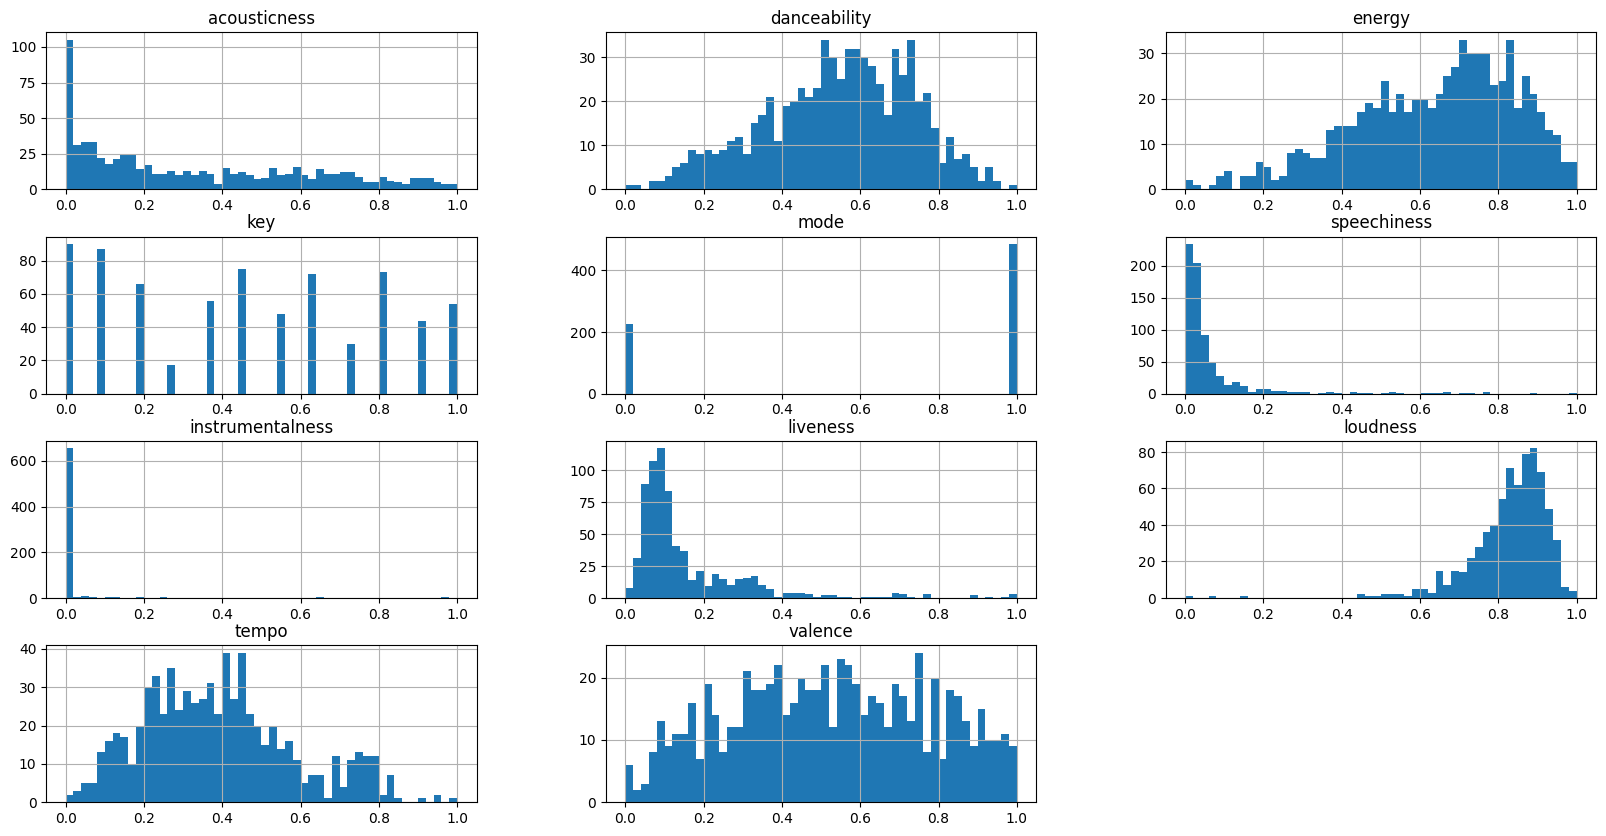

In [273]:
# Normalización de valores
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

to_cluster = ['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']

user_normalized = mm.fit_transform(df_user[to_cluster])

# new dataframe
df_user_normalized = pd.DataFrame(user_normalized,columns=to_cluster)

# Poner estas columnas nuevamente en el dataframe
df_user_normalized['artist'] = df['artist']
df_user_normalized['name'] = df['name']

df_user_normalized[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].hist(bins=50, figsize=(20,10))
#plt.show()

### Utilizando K-Nearest-Neighbor
Buscar el cluster más próximo y recomendar música de él.

In [282]:
from sklearn.neighbors import NearestNeighbors

## Datos estandarizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_standard)

selected_song = df_user_standard[(df['name'] == 'The Less I Know The Better') & (df['artist'] == 'Tame Impala')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
            'mode', 'speechiness',
           'instrumentalness','liveness','loudness',
           'tempo', 'valence']].values
selected_song = ss.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")


Avant Gardener by Courtney Barnett - 10.468321179870536
Lost Stars by Adam Levine - 10.471188912945143
El Paraíso by Los Mesoneros - 10.548089707093283
Me Voy by Julieta Venegas - 10.614792976371517
Smile by Lily Allen - 10.630457160254029


c:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [281]:
from sklearn.neighbors import NearestNeighbors

## Datos normalizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_normalized)

selected_song = df_user_normalized[(df['name'] == 'Fanatica Sensual') & (df['artist'] == 'Plan B')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
                            'mode', 'speechiness',
                            'instrumentalness','liveness','loudness',
                            'tempo', 'valence']].values
selected_song = mm.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")


Fanatica Sensual by Plan B - 0.5780190140178504
Ready or Not by Bridgit Mendler - 0.7054873578868718
La Tortura (feat. Alejandro Sanz) by Shakira - 0.7260421477497024
Gasolina by Daddy Yankee - 0.7456581143977358
A Llorar a Otra Parte by Grupo Treo - 0.7554388225701785


c:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### Se utiliza k-means para conseguir un cluster de canciones con características parecidas

Text(0.5, 1.0, 'Elbow Method')

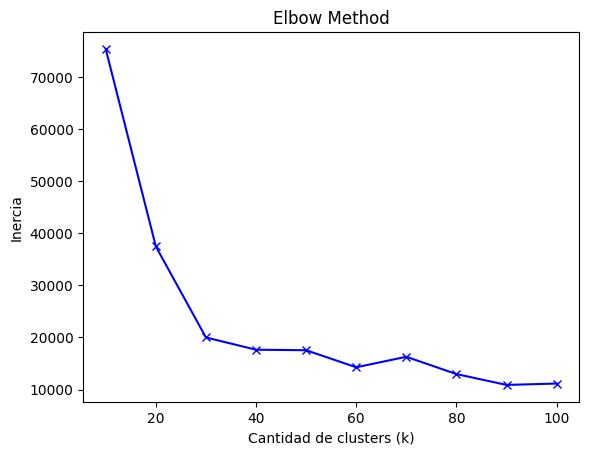

In [290]:
import kmeans as km

chosen_song = df_user[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]
df_user.drop(columns=['artist', 'name'], inplace=True)

k = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
valores_de_inercia = []
for i in k:
    using_kmeans = km.Kmeans(df_user, i, 0.001)
    clusters = using_kmeans.clustering(1000)
    valores_de_inercia.append(using_kmeans.get_inertia(clusters))

plt.plot(k, valores_de_inercia, 'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method')

In [291]:
using_kmeans = km.Kmeans(df_user, 60, 0.001)
clusters = using_kmeans.clustering(1000)

df_user['name'] = df['name']
df_user['artist'] = df['artist']

# saber cluster al que pertenece cada canción
df_user['cluster'] = clusters

chosen_song_cluster = df_user[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]['cluster'].values[0]
# get all the songs from the same cluster
songs_from_cluster = df_user[df_user['cluster'] == chosen_song_cluster][['name', 'artist']]
songs_from_cluster['acousticness'] = df['acousticness']
songs_from_cluster['danceability'] = df['danceability']
songs_from_cluster['energy'] = df['energy']
songs_from_cluster['key'] = df['key']
songs_from_cluster['mode'] = df['mode']
songs_from_cluster['speechiness'] = df['speechiness']
songs_from_cluster['instrumentalness'] = df['instrumentalness']
songs_from_cluster['liveness'] = df['liveness']
songs_from_cluster['loudness'] = df['loudness']
songs_from_cluster['tempo'] = df['tempo']
songs_from_cluster['valence'] = df['valence']

In [257]:
songs_from_cluster[(df['name'] == 'La Loba') & (df['artist'] == 'Miriam y Las Chicas')]

C:\Users\valer\AppData\Local\Temp\ipykernel_3540\2407595178.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  songs_from_cluster[(df['name'] == 'La Loba') & (df['artist'] == 'Miriam y Las Chicas')]


,name,artist,acousticness,danceability,energy,key,mode,speechiness,instrumentalness,liveness,loudness,tempo,valence
67,La Loba,Miriam y Las Chicas,0.757,0.743,0.625,0,0,0.0555,0.000499,0.11,-10.001,143.171,0.911


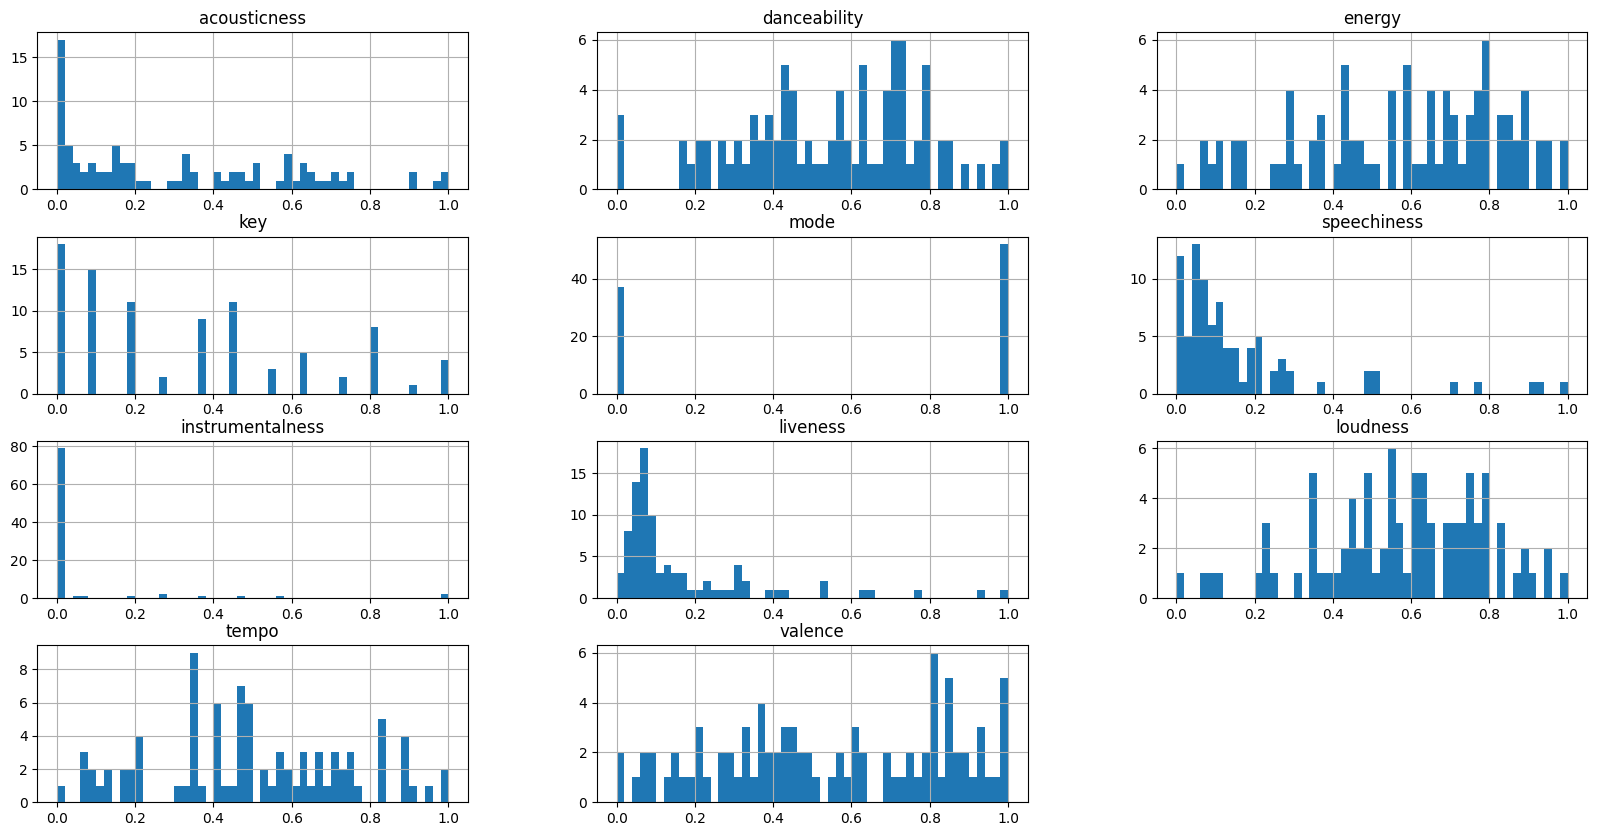

In [292]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Assuming songs_from_cluster is your original DataFrame
to_cluster = ['acousticness', 'danceability', 'energy', 'key',
              'mode', 'speechiness',
              'instrumentalness', 'liveness', 'loudness',
              'tempo', 'valence']

# Create a copy of the DataFrame
df_user_normalized = songs_from_cluster.copy()

# Extract the subset of columns for normalization
subset_for_normalization = df_user_normalized[to_cluster]

# Normalize the subset of columns
mm = MinMaxScaler()
normalized_values = mm.fit_transform(subset_for_normalization)

# Create a new DataFrame with the normalized values
df_user_normalized[to_cluster] = normalized_values

# Include 'name' and 'artist' columns
df_user_normalized['name'] = songs_from_cluster['name']
df_user_normalized['artist'] = songs_from_cluster['artist']

# Plot histograms
df_user_normalized[to_cluster].hist(bins=50, figsize=(20, 10))
plt.show()

In [295]:
df_user_normalized

,name,artist,acousticness,danceability,energy,key,mode,speechiness,instrumentalness,liveness,loudness,tempo,valence
6,Rush,Troye Sivan,0.003061,0.725363,0.837758,0.454545,0.0,0.272796,0.000047,0.066339,0.494370,0.207519,0.363119
16,Gloria,Laura Branigan,0.116614,0.778675,0.699115,0.818182,1.0,0.011398,0.477199,0.114411,0.563350,0.573809,0.859306
22,Vicious,Sabrina Carpenter,0.335825,0.689822,0.277286,0.000000,1.0,1.000000,0.000000,0.230851,0.554258,0.479964,0.633767
37,The One That Got Away,Katy Perry,0.000795,0.634895,0.771386,0.090909,0.0,0.060030,0.000000,0.168892,0.795563,0.754131,0.885082
105,Un Buen Perdedor,Franco De Vita,0.486328,0.232633,0.255162,0.000000,1.0,0.110182,0.000000,0.536374,0.072567,0.179771,0.130061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Ribs,Lorde,0.582300,0.350565,0.299410,0.363636,1.0,0.483283,1.000000,0.072749,0.357328,0.342123,0.000000
682,Primadonna,MARINA,0.096329,0.591276,0.619469,0.363636,0.0,0.047872,0.000000,0.053734,0.908333,0.342261,0.415745
694,Let Your Heart Hold Fast,Fort Atlantic,0.153695,0.282714,0.283186,0.454545,1.0,0.000760,0.000301,0.118684,0.499041,0.754200,0.455483
698,Prime Time - Live,Alan Parsons,0.475422,0.224556,0.761062,0.181818,0.0,0.182371,0.000819,1.000000,0.439153,0.541999,0.386747


In [294]:
from sklearn.neighbors import NearestNeighbors

## Datos normalizados
model_knn = NearestNeighbors(n_neighbors = 5, metric = 'euclidean', algorithm='brute').fit(user_normalized)

selected_song = df_user_normalized[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]
selected_song_features = selected_song[['acousticness', 'danceability', 'energy', 'key',
                            'mode', 'speechiness',
                            'instrumentalness','liveness','loudness',
                            'tempo', 'valence']].values
selected_song = mm.transform(selected_song_features)

distances, indices = model_knn.kneighbors(selected_song)
recommended_songs = df.iloc[indices[0]][['name', 'artist']].to_dict(orient = 'records')

for song, distance in zip(recommended_songs, distances[0]):
    print(f"{song['name']} by {song['artist']} - {distance}")

So-so by Baek A Yeon - 8.491546927650484
All with You by TAEYEON - 8.499239747304811
1950 by King Princess - 8.51080186002006
Culpable O No - Miénteme Como Siempre by Luis Miguel - 8.514977143121639
Crazy Little Thing Called Love - Remastered 2011 by Queen - 8.515420162892607


C:\Users\valer\AppData\Local\Temp\ipykernel_3540\352917964.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_song = df_user_normalized[(df['name'] == 'Mamma Mia') & (df['artist'] == 'ABBA')]
c:\Users\valer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
